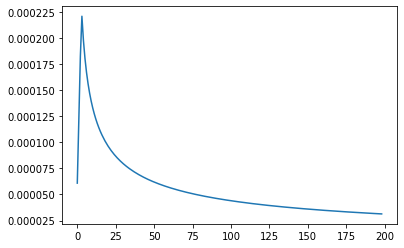

In [16]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.minimum(512**(-.5)*np.arange(1,200)**(-.5),np.arange(1,200)*30**(-1.5)))

In [8]:
from modules import *
from constants import *


# ReactionDataset class
class ReactionDataset(Dataset):

    def __init__(self, 
                 data, 
                 split,
                 maxlen=MAX_SEQ_LEN,
                 rep=" ^$#%()+-./0123456789=@ABCDEFGHIKLMNOPRSTVXYZ[\\]abcdefgilmnoprstuy"):
        
        self.split = split
        self.data = data[self.split]
        self.maxlen = maxlen
        self.rep = rep
        self.char_to_ix = { ch:i for i,ch in enumerate(rep) }
        self.ix_to_char = { i:ch for i,ch in enumerate(rep) }
        # Add augmentation methods here later
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        rs_smiles = self.data[index]["rs"]
        ps_smiles = self.data[index]["ps"]
        if rs_smiles[0] == ".":
            rs_smiles=rs_smiles[1:]
        if ps_smiles[0] == ".":
            ps_smiles=ps_smiles[1:]
        
        
        rs_smiles = self.ix_to_char[BOS_IDX] + rs_smiles + self.ix_to_char[EOS_IDX] + (self.maxlen-len(rs_smiles)-2)*" "
        ps_smiles = ps_smiles + (self.maxlen-len(ps_smiles))*" "
        
        # Augment smiles here for train
        
        rs = np.array([self.char_to_ix[char] for char in rs_smiles])
        ps = np.array([self.char_to_ix[char] for char in ps_smiles])
        
        return {
            "rs": rs,
            "ps": ps
        }


In [15]:
import os
from datetime import datetime
folder_dir = os.path.expanduser("~/models/chemformers/") 
day_dir = datetime.now().strftime("%Y-%m-%d")
if day_dir not in os.listdir(folder_dir):
    os.mkdir(folder_str + day_dir)

total_dir_path = folder_dir+day_dir+"/"
print(total_dir_path)

/home/arvid/models/chemformers/2021-10-01/


In [9]:
file = open("/home/arvid/data/USTPO_paper_5x/USTPO_5x_parsed.pickle",'rb')
data = pickle.load(file)
datasets = {}
dataloaders = {}
for split in ['train', 'eval']:
    datasets[split] = ReactionDataset(data=data,
                                   split=split)

    dataloaders[split] = DataLoader(datasets[split],
                                    batch_size=32,
                                    shuffle=(split != 'test'),
                                    num_workers=8,
                                    pin_memory=False,
                                    drop_last=True)

In [11]:
next(iter(dataloaders["train"]))["rs"].shape

torch.Size([32, 160])

In [ ]:
1. initialize dataset (also which dataset)
2. initialize retro pred model
3. initialize tree search.
.
.
.
.
x. finetune retro pred model.
.
.
.
.
y. consider molecules in test set, iteratively perform retrosynth, score different routes, ....
return resutlts

In [ ]:
class Experiment():

    def __init__(self, experiment_settings):
        #initialize experiment specifications
    
    def perform_experiment()
        for instruction in self.experiment_settings call follow_instriction()
    
    def follow_instruction()
        outputs = model(inputs)
    
        
    

In [ ]:
class model():
    
    def predict()
    
    

In [ ]:
class transformer(model)
    use pytorch
    def predict()
    
    def train()